In [1]:
import numpy as np
import torch

from train import TrainerDeepSVDD

from preprocess import get_mnist
from preprocess import get_mvtec

In [2]:
class Args:

    num_epochs=5
    num_epochs_ae=5
    patience=50
    lr=1e-4
    weight_decay=0.5e-6
    weight_decay_ae=0.5e-3
    lr_ae=1e-4
    lr_milestones=[50]
    batch_size=200
    pretrain=True
    latent_dim=32
    normal_class=1
    mvtec_dir = './data/mvtec_exp'

    
    
args = Args()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# # mnist datset
# data = get_mnist(args)

# mvtec dataset(custom dataset)
data = get_mvtec(args.mvtec_dir)
deep_SVDD = TrainerDeepSVDD(args, data, device)

if args.pretrain:
    deep_SVDD.pretrain()

5/5: [>...............................] - ETA 0.0s
Pretraining Autoencoder... Epoch: 0, Loss: 1896.746
5/5: [>...............................] - ETA 0.0s
Pretraining Autoencoder... Epoch: 1, Loss: 1886.685
5/5: [>...............................] - ETA 0.0s
Pretraining Autoencoder... Epoch: 2, Loss: 1877.841
5/5: [>...............................] - ETA 0.0s
Pretraining Autoencoder... Epoch: 3, Loss: 1870.155
5/5: [>...............................] - ETA 0.0s
Pretraining Autoencoder... Epoch: 4, Loss: 1862.834


In [3]:
deep_SVDD.train()

5/5: [>...............................] - ETA 0.0s
Training Deep SVDD... Epoch: 0, Loss: 2.665
5/5: [>...............................] - ETA 0.0s
Training Deep SVDD... Epoch: 1, Loss: 2.268
5/5: [>...............................] - ETA 0.0s
Training Deep SVDD... Epoch: 2, Loss: 1.924
5/5: [>...............................] - ETA 0.0s
Training Deep SVDD... Epoch: 3, Loss: 1.637
5/5: [>...............................] - ETA 0.0s
Training Deep SVDD... Epoch: 4, Loss: 1.401


Testing...
c [-35.266815 109.478745]


/home/iai/anaconda3/envs/jwsvdd/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/iai/anaconda3/envs/jwsvdd/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


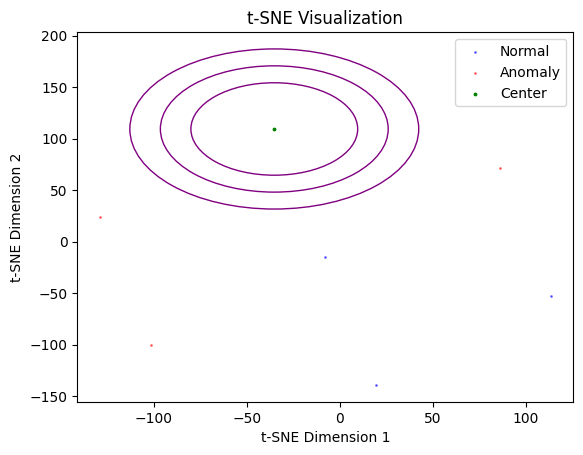

ROC AUC score: 0.00


In [4]:
from test import eval

labels, scores = eval(deep_SVDD.net, deep_SVDD.c, data[1], device)

Scores (Inliers): [0.2941556  0.30186313 0.29768473]
Scores (Outliers): [0.26958963 0.2713316  0.27009034]


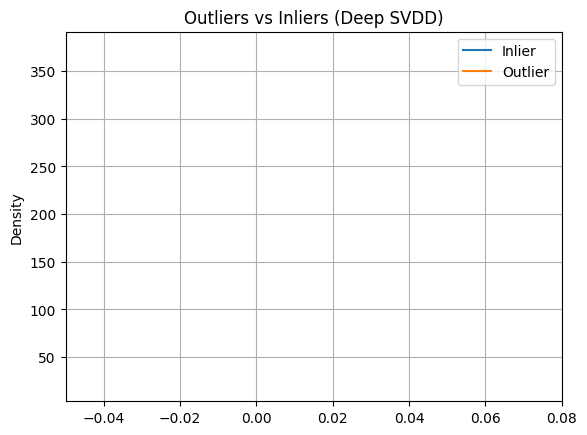

In [5]:
import matplotlib.pyplot as plt
import pandas as pd 

scores_in = scores[np.where(labels==0)[0]]
scores_out = scores[np.where(labels==1)[0]]

# Print scores_in and scores_out
print("Scores (Inliers):", scores_in)
print("Scores (Outliers):", scores_out)


in_ = pd.DataFrame(scores_in, columns=['Inlier'])
out_ = pd.DataFrame(scores_out, columns=['Outlier'])


fig, ax = plt.subplots()
in_.plot.kde(ax=ax, legend=True, title='Outliers vs Inliers (Deep SVDD)')
out_.plot.kde(ax=ax, legend=True)
plt.xlim(-0.05, 0.08)
ax.grid(axis='x')
ax.grid(axis='y')
plt.show()